In [71]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [146]:
class Histogram:
    def __init__(self, n=5, seed=1):
        self.seed = np.random.seed(seed)
        self.sizes = [10 * 10**i for i in np.arange(0, n)]
        
    def show(self, figsize=(18, 28)):
        fig = plt.figure(figsize=figsize, facecolor="white")
        for i, size in enumerate(self.sizes):
            data = np.random.randn(size)
            bin_sizes, labels = self.__get_bin_sizes_each_rule(data)
            for j, (bin_size, label) in enumerate(zip(bin_sizes, labels)):
                ax = fig.add_subplot(len(sizes), len(bin_sizes), len(bin_sizes)*i+j+1)
                ax.set_title(f'data size: {size}\n bins: {bin_size}\n label: {label}')
                if (j != 0):
                    ax.set_yticks([])
                ax.set_xticks([])
                ax.hist(data, ec='black', bins=bin_size)
        plt.show()
        
    def __get_bin_sizes_each_rule(self, data):
        bin_sizes, labels = [10], ['default'] # default size = 10
        # sturges
        bin_sizes.append(self.__sturges_formula(data))
        labels.append('sturges')
        # square
        bin_sizes.append(self.__square_root_choice(data))
        labels.append('square')
        # rice
        bin_sizes.append(self.__rice_rule(data))
        labels.append('rice')
        # scott
        bin_sizes.append(self.__scott_rule(data))
        labels.append('scott')
        # doane
        bin_sizes.append(self.__doane_formula(data))
        labels.append('doane')
        return bin_sizes, labels
    
    def __sturges_formula(self, X):
        return np.ceil(1 + np.log2(X.size)).astype(np.int8)
    
    def __square_root_choice(self, X):
        return np.ceil(np.sqrt(X.size)).astype(np.int8)
    
    def __rice_rule(self, X):
        return np.ceil(2 * X.size ** (1/3)).astype(np.int8)
    
    def __scott_rule(self, X):
        """
        I don't know that numpy.ceil is used this formula.
        this value became minus when data size is big.
        for now, I used absolute output to avoid minus value. I'll check the reason in the future. 
        """
        n = X.size
        standard_deviation = np.std(X)
        return np.abs(np.ceil((3.49 * standard_deviation * n**(1/3))).astype(np.int8))
    
    def __doane_formula(self, X):
        "I don't know that numpy.ceil is used this formula"
        n = X.size
        mu = np.mean(X)
        standard_deviation = np.std(X)
        skewness = np.abs(np.mean(((X - mu)/standard_deviation)**3))
        sigma_skewness = np.sqrt((6 * n - 2)/(n + 1) * (n + 2))
        return np.ceil(1 + np.log2(n) + np.log2(1 + skewness/sigma_skewness)).astype(np.int8)

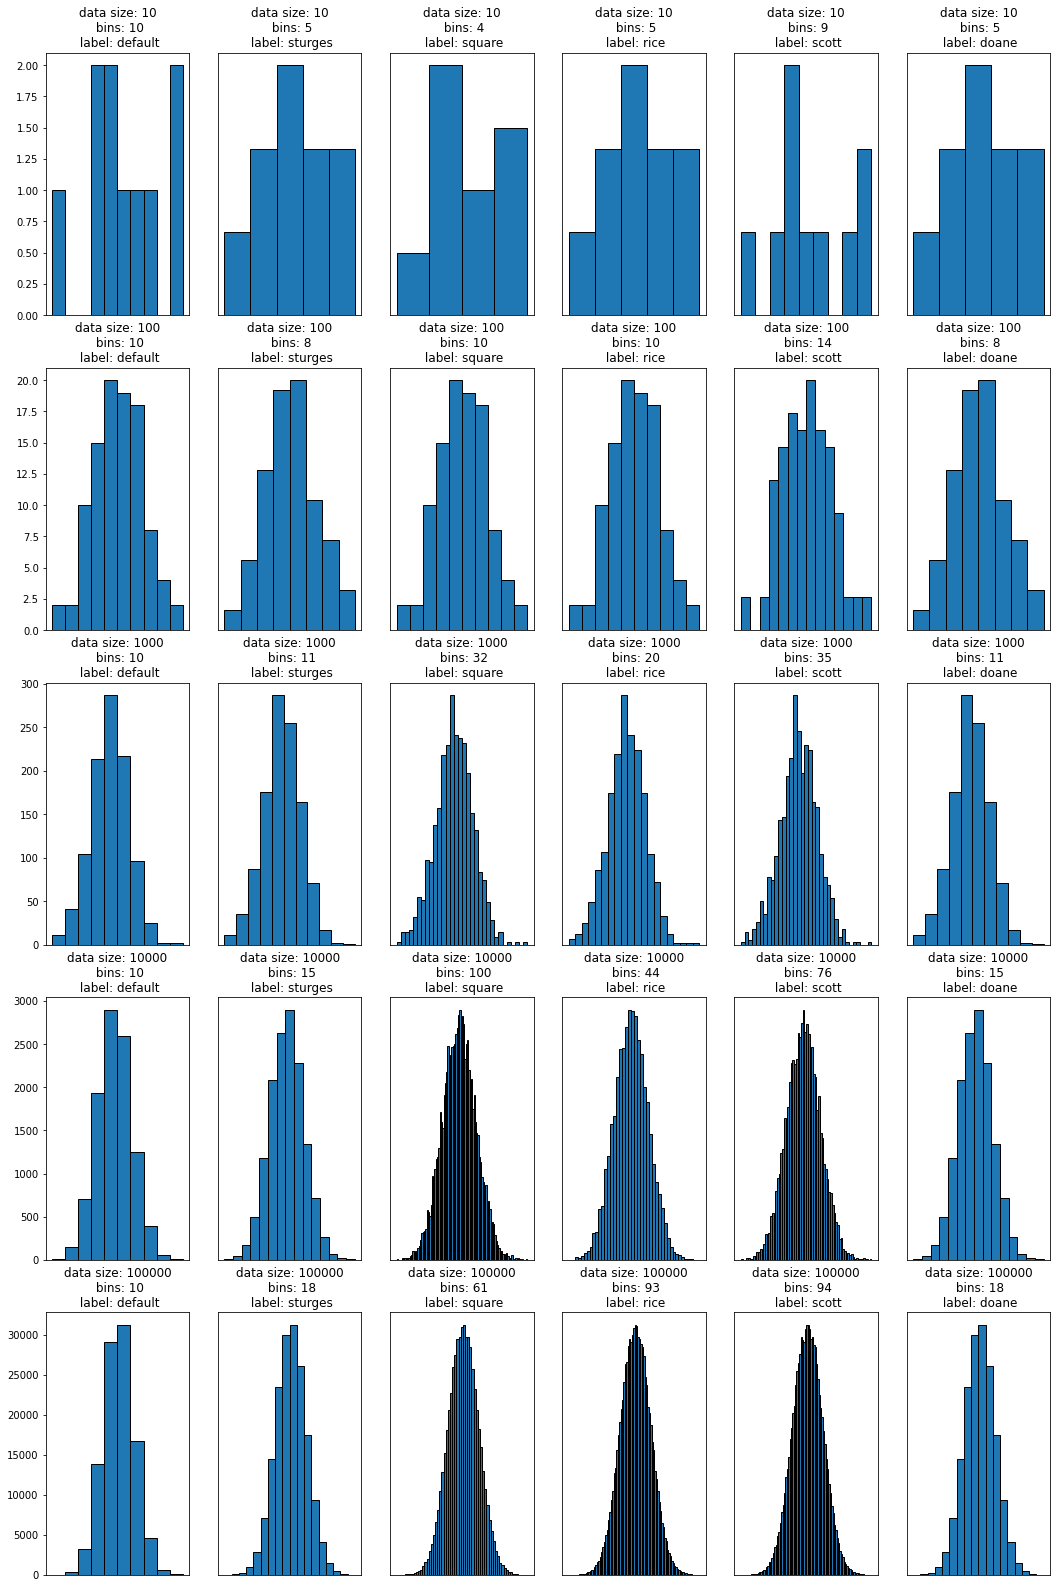

In [148]:
if __name__ == '__main__':
    Histogram().show()